#Introduction to Regression with Neural Network in Tensorflow

there are many definitions for a regression problem but in our case , we're going to simplify it: predicting a numerical variable based on some other combination of variables,even shorter.. predicting a number

In [ ]:
#import tensorflow
import tensorflow as tf
tf.__version__

'2.17.0'

##creating some data to view and fit

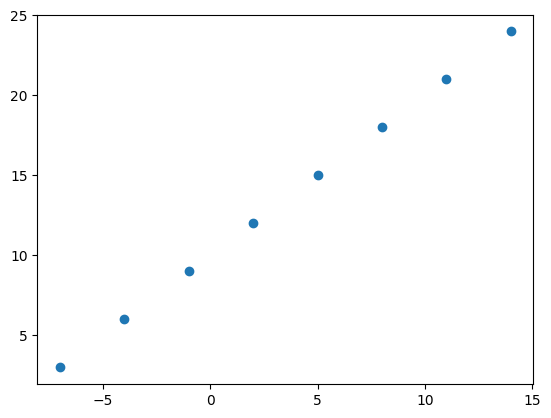

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create labels
y=np.array([3,6,9,12,15,18,21,24],dtype=np.float32)

#visualise it
plt.scatter(x,y)

In [ ]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##input and output shapes

In [ ]:
#create a demo tensor for our housing price prediction problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape , output_shape

((), ())

In [ ]:
x[0],y[0]

(-7.0, 3.0)

In [ ]:
x[0].ndim

0

In [ ]:
#turn our np arrays into tensors
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

In [ ]:
x ,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

##steps in modelling with tensorflow

- **creating a model** - define the input and output layers, as well as the hidden layer of the deep learning model
- **compiling a model**- define the loss function(in other words , the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
- **fitting a model** - letting the moel try to find patterns between features and labels

In [ ]:
from tensorflow import keras

In [ ]:
tf.random.set_seed(42)
#create a model using the sequential api
model=keras.Sequential([
    keras.layers.Dense(1)
])

#compile
model.compile(loss=keras.losses.mae,  #mae is mean absolute error
              optimizer=keras.optimizers.SGD(0.01),  #SGD is stochastic gradient descent
              metrics=['mae']
              )

#fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5);

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 11.0796 - mae: 11.0796
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - loss: 10.9471 - mae: 10.9471
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 10.8146 - mae: 10.8146
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.6821 - mae: 10.6821
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 10.5496 - mae: 10.5496


In [ ]:
# #optionally , the first layer can recieve an 'input_shape' argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
# # Afterwards , we do automatically shape inference:
# model.add(tf.keras.layers.Dense(4))

model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss=keras.losses.mae,  #mae is mean absolute error
              optimizer=keras.optimizers.SGD(0.01),  #SGD is stochastic gradient descent
              metrics=['mae'])
model.fit(tf.expand_dims(x,axis=1),y,epochs=10);

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.5169 - mae: 14.5169
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step - loss: 14.3844 - mae: 14.3844
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 14.2519 - mae: 14.2519
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 14.1194 - mae: 14.1194
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 13.9869 - mae: 13.9869
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 13.8544 - mae: 13.8544
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 13.7219 - mae: 13.7219
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 13.5894 - mae: 13.5894
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 13.4569 - mae: 13.4569
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.3244 - mae: 13.3244


In [ ]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and make a prediction using our model
model.predict(np.array([19.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


array([[1.2296336]], dtype=float32)

## Improving our model

We can improve our model , by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers ,
increase the number of hidden units(all called neurons)
within each of the hidden layers , change the activation function of each layers.
2. **Compiling a model** - here we might change the optimisation function or perhaps the **learning rate** of the optimisation function
3. **Fitting the Model** - here we might fit the model for more **epocks** (leave it training for more longer) or on more data (give the data model more example to learn from)

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss=keras.losses.mae,  #mae is mean absolute error
              optimizer=keras.optimizers.SGD(0.01),  #SGD is stochastic gradient descent
              metrics=['mae'])
model.fit(tf.expand_dims(x,axis=1),y,epochs=100);

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 18.5228 - mae: 18.5228
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 18.2415 - mae: 18.2415
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 17.9603 - mae: 17.9603
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 17.6790 - mae: 17.6790
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 17.3978 - mae: 17.3978
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 17.1165 - mae: 17.1165
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 16.8353 - mae: 16.8353
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 16.5540 - mae: 16.5540
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 16.2728 - mae: 16.2728
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 15.9915 - mae: 15.9915
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 15.7103 - mae: 15.7103
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 15.4290 - mae: 15.4290
Epoch 13/100
1/1 ━━━━━━━━━━

In [ ]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[29.20721]], dtype=float32)

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation=None))
model.add(tf.keras.layers.Dense(1))
model.compile(loss=keras.losses.mae,  #mae is mean absolute error
              optimizer=keras.optimizers.SGD(),
              metrics=['mae'])
model.fit(tf.expand_dims(x,axis=1),y,epochs=100);

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.5560 - mae: 13.5560
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 12.9967 - mae: 12.9967
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.4363 - mae: 12.4363
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.8718 - mae: 11.8718
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.3003 - mae: 11.3003
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.7189 - mae: 10.7189
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.1245 - mae: 10.1245
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.5140 - mae: 9.5140
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.8845 - mae: 8.8845
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.2325 - mae: 8.2325
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.5548 - mae: 7.5548
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.1997 - mae: 7.1997
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


array([[29.17432]], dtype=float32)

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,activation=None))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mae',  #mae is mean absolute error
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])
model.fit(tf.expand_dims(x,axis=1),y,epochs=100);
model.predict(np.array([17.0]))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.5016 - mae: 12.5016
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 11.8424 - mae: 11.8424
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.1749 - mae: 11.1749
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.4983 - mae: 10.4983
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.8112 - mae: 9.8112
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.1109 - mae: 9.1109
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.3941 - mae: 8.3941
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.6578 - mae: 7.6578
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.9022 - mae: 6.9022
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.8160 - mae: 6.8160
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.0820 - mae: 7.0820
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 7.2301 - mae: 7.2301
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

array([[26.619833]], dtype=float32)

## Evaluating the model

In practice , a typical workflow you'll go through when building a neural networks is :

```
Build a model -> fit it -> evaluate it -> tweak the model ->fit it -> evaluate it -> repeat
```

when it comes to evaluation ... there are 3 words you should memorize :

> "Visualise,Visualise,Visualise"

its a good idea to visualise :
* the data - what data are we working with? what does it look like?
* the model itself - what does our model look like?
* the training of the model - how does the model perform while it learns ?
* the predictions of the model - how do the predictions of a model line up the ground truth(original labels)

In [ ]:
# make a bigger dataset
x=tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y=x+10

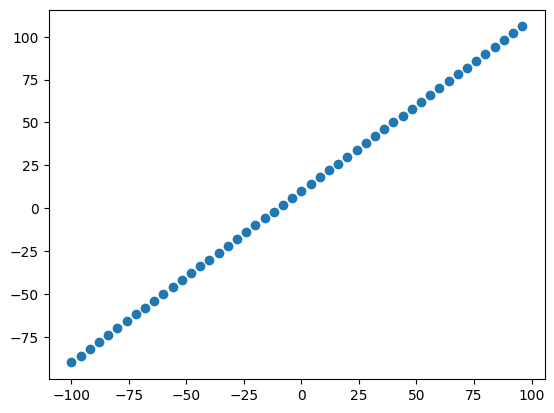

In [ ]:
#visualise the data
import matplotlib.pyplot as plt

plt.scatter(x,y)

In [ ]:
x=tf.cast(tf.constant(x),dtype=tf.int32)
y=tf.cast(tf.constant(y),dtype=tf.int32)

In [ ]:
# The 3 sets : training , validation , test
x_train=x[:40]
y_train=y[:40]
x_test=x[40:]
y_test=y[40:]

## Visualise the data
Now that we have got our data split into training and test splits ... lets visualise it again

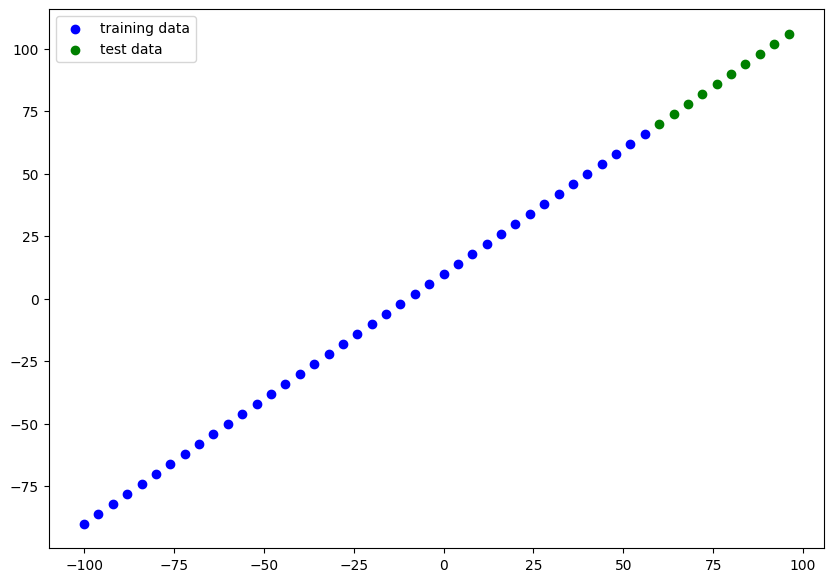

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train ,y_train,c='b',label='training data')
plt.scatter(x_test,y_test,c='g',label='test data')
plt.legend();

## Lets have a look at how to build our neuaral network

In [ ]:
from tensorflow import keras
# create a model
model= tf.keras.Sequential()

# add layers
# model.add(tf.keras.layers.Dense(50,activation=None))
model.add(tf.keras.layers.Dense(1))

#compile the model
model.compile(loss='mae',  #mae is mean absolute error
              optimizer=keras.optimizers.SGD(),
              metrics=['mae'])


# fit the model
model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=10);

# summarise the model
model.summary()

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step - loss: 58.7797 - mae: 58.7797
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.2463 - mae: 24.2463  
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.6959 - mae: 11.6959 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6507 - mae: 8.6507 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.1194 - mae: 10.1194 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8415 - mae: 11.8415 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7604 - mae: 8.7604 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2292 - mae: 10.2292 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.9973 - mae: 11.9973 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.6780 - mae: 12.6780 


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# lets create a model that builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)
#create a model using the sequential api
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=[1], activation="relu" , name = "inputlayer"),  # Start with more neurons
    keras.layers.Dense(1 , name = "output_layer")
])
#compile
model.compile(loss=keras.losses.mae,  #mae is mean absolute error
              optimizer=keras.optimizers.Adam(learning_rate = 0.01),  #SGD is stochastic gradient descent
              metrics=['mae']
              )

#fit the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputlayer (Dense)                   │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable params** - these are the parameters(patterns) the model can update as it trains
* **NonTrainable params** -  these are the parameters(patterns) arent updated during training (this is typical when you bring in already learnt patterns or params from other models during **transfer learning**)

In [ ]:
x_train.shape , y_train.shape

(TensorShape([40]), TensorShape([40]))

In [ ]:
model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100, verbose = 1);

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - loss: 45.7724 - mae: 45.7724
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.5671 - mae: 42.5671 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.3691 - mae: 39.3691 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36.1711 - mae: 36.1711 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.9709 - mae: 32.9709 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.7678 - mae: 29.7678
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.4612 - mae: 26.4612 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.0062 - mae: 23.0062 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.5058 - mae: 19.5058 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.0064 - mae: 16.0064 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.4858 - mae: 12.4858 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.1476 - mae: 9.1476
Epoch 13/100
2/2 ━━━━━━━━━

In [ ]:
# get a summary of our model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputlayer (Dense)                   │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

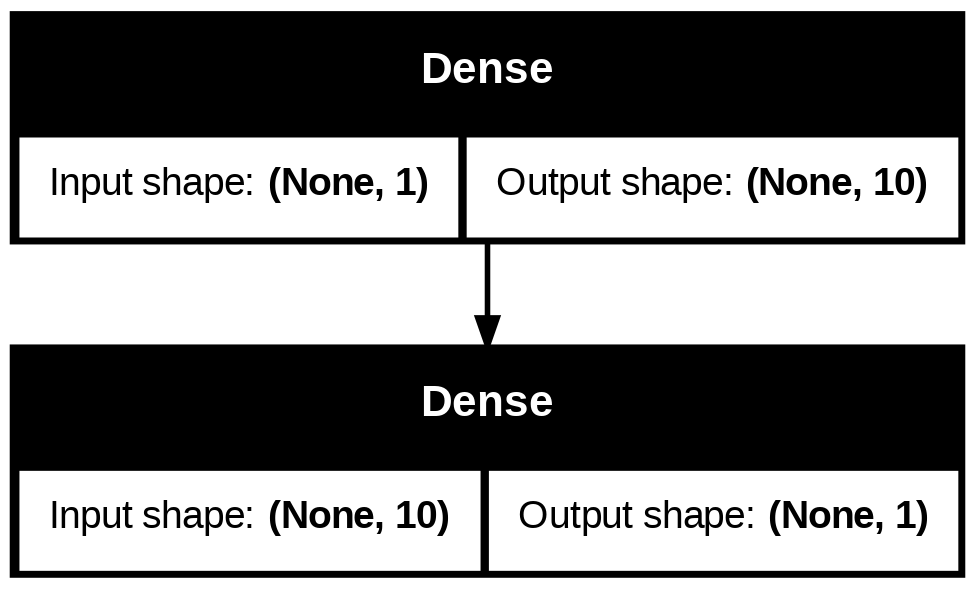

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

### Visualising our models predictions

to visualize predictions  , its a good idea to plot them against the ground thruth labels .

Often u will see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth model predictions

In [ ]:
y_pred = model.predict(tf.expand_dims(x_test,axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


In [ ]:
y_pred

array([[ 73.93234 ],
       [ 78.55036 ],
       [ 83.16838 ],
       [ 87.786385],
       [ 92.40439 ],
       [ 97.02241 ],
       [101.64042 ],
       [106.25844 ],
       [110.87645 ],
       [115.49446 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# lets create a plotting function , if you think you are going to reuse some kind of functionality in the future , better to turn it into a function

def plot_pred(train_data = tf.expand_dims(x_train,axis=-1),
              train_labels= y_train,
              test_data = tf.expand_dims(x_test,axis=-1),
              test_labels = y_test,
              predictions = y_pred):
  """
  Plots training data , test data and compares predictions
  """

  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data,train_labels,c='b',label='training data')
  # Plot test data in green
  plt.scatter(test_data,test_labels,c='g',label='test data')
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data,predictions,c='r',label='predictions')
   # show the legend
  plt.legend();



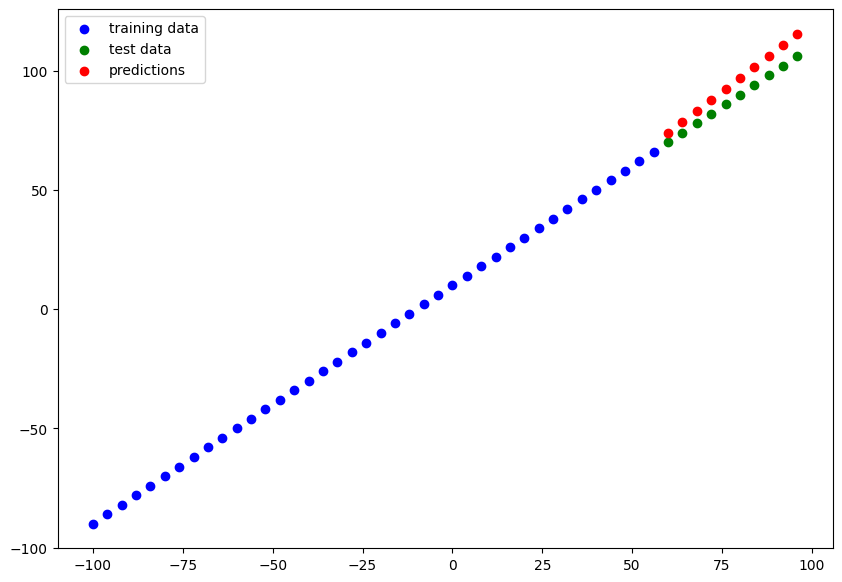

In [ ]:
plot_pred()

### Evaluating our model with regression evaluation metrics

Depending on the problem you are working on , there will be different evaluation metrics to evaluate your model's performance .

Since we are working on a regression , two of the main metrics :

* MAE - mean absolute error , 'on average , how wrong is each of my model's predictions
* MSE - mean squared error , 'square the average errors'

In [ ]:
#evaluate the model on test dataset
model.evaluate(tf.expand_dims(x_test,axis=-1),y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 6.7134 - mae: 6.7134


[6.713403224945068, 6.713403224945068]

In [ ]:
#calculate the MAE

tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3.9323425, 4.5503616, 5.1683807, 5.7863846, 6.4043884, 7.0224075,
       7.640419 , 8.258438 , 8.87645  , 9.494461 ], dtype=float32)>

In [ ]:
#calculate the MSE

tf.keras.losses.MSE(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.463318, 20.705791, 26.71216 , 33.482246, 41.01619 , 49.31421 ,
       58.376003, 68.2018  , 78.79136 , 90.14479 ], dtype=float32)>

In [ ]:
#calculate huber

huber_loss = keras.losses.Huber()

# Calculate the Huber loss
huber_loss(y_test, y_pred).numpy()

6.213403

In [ ]:
y_pred = tf.squeeze(y_pred)
y_test.shape , y_test.dtype , y_pred.shape , y_pred.dtype

(TensorShape([10]), tf.int32, TensorShape([10]), tf.float32)

In [ ]:
y_test =tf.cast(y_test , dtype = tf.float32)

In [ ]:
np.mean(y_test-y_pred)

-6.713403

In [ ]:
# make some functions to reuse mae and mse

def mae(y_true,y_pred):
  return tf.keras.losses.MAE(y_true=y_test,y_pred=y_pred)
def mse(y_true,y_pred):
  return tf.keras.losses.MSE(y_true=y_test,y_pred=y_pred)


### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak the model ->fit it -> evaluate it -> repeat
```

* Get more data
* make your model larger
* Train for longer

Lets do 3 modelling experiments:

1. `model_1` - same as original , 1 layer trained for 100 epochs
2. `model_2` - 2 layers , 1layer trained for 100 epochs
3. `model_3` - 2 layers , 1layer trained for 500 epochs


**Build** `Model_1`

In [ ]:
x_train = tf.cast(tf.expand_dims(x_train,axis=-1),dtype=tf.float32)

In [ ]:
print(x_train , y_train)

tf.Tensor(
[[-100.]
 [ -96.]
 [ -92.]
 [ -88.]
 [ -84.]
 [ -80.]
 [ -76.]
 [ -72.]
 [ -68.]
 [ -64.]
 [ -60.]
 [ -56.]
 [ -52.]
 [ -48.]
 [ -44.]
 [ -40.]
 [ -36.]
 [ -32.]
 [ -28.]
 [ -24.]
 [ -20.]
 [ -16.]
 [ -12.]
 [  -8.]
 [  -4.]
 [   0.]
 [   4.]
 [   8.]
 [  12.]
 [  16.]
 [  20.]
 [  24.]
 [  28.]
 [  32.]
 [  36.]
 [  40.]
 [  44.]
 [  48.]
 [  52.]
 [  56.]], shape=(40, 1), dtype=float32) tf.Tensor(
[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66], shape=(40,), dtype=int32)


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(x_train,y_train,epochs=100)



Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step - loss: 52.1868 - mae: 52.1868
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 18.5463 - mae: 18.5463  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9855 - mae: 11.9855 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0690 - mae: 8.0690 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7880 - mae: 9.7880 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0512 - mae: 8.0512 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7764 - mae: 9.7764 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1590 - mae: 8.1590 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7024 - mae: 8.7024 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5692 - mae: 8.5692 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3372 - mae: 8.3372 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0801 - mae: 9.0801 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


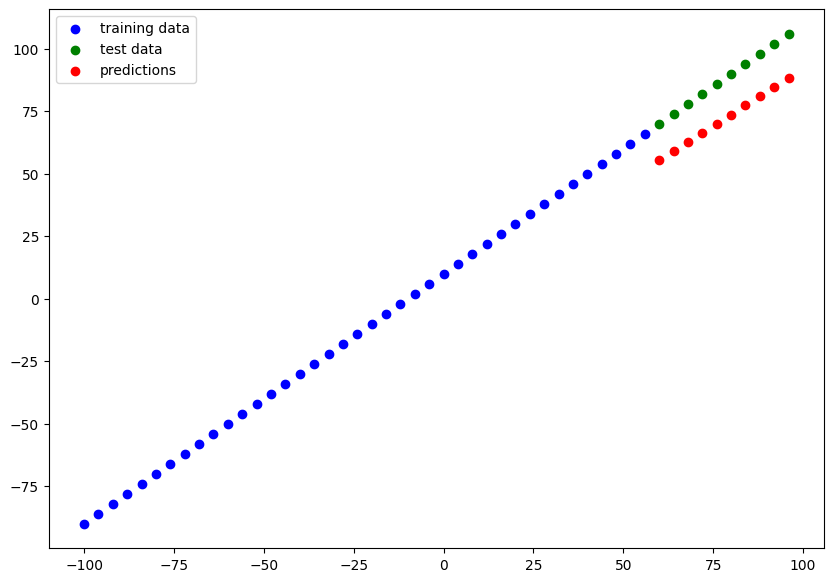

In [ ]:
#make and plot predictions for model 1

y_pred_1 = model_1.predict(tf.expand_dims(x_test,axis=-1))
plot_pred(predictions=y_pred_1)


In [ ]:
y_preds_1 = tf.squeeze(y_pred_1)
# calculate model_1 evaluation metrics
mae1 = mae(y_test,y_pred_1)
mse1 = mse(y_test,y_pred_1)
mae1 , mse1

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([14.37484 , 14.759621, 15.144402, 15.529182, 15.913963, 16.298744,
        16.683525, 17.068306, 17.453087, 17.837868], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([206.63602, 217.8464 , 229.3529 , 241.1555 , 253.25423, 265.64905,
        278.34   , 291.32706, 304.61023, 318.1895 ], dtype=float32)>)

**Build** `Model_2`

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(x_train,y_train,epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 484ms/step - loss: 57.4836 - mae: 57.4836
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.4933 - mae: 29.4933  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5096 - mae: 7.5096 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.1854 - mae: 14.1854 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0038 - mae: 6.0038 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8822 - mae: 8.8822 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1543 - mae: 8.1543 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5274 - mae: 11.5274 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.6000 - mae: 13.6000 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7846 - mae: 9.7846 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4262 - mae: 7.4262 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.2943 - mae: 11.2943
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


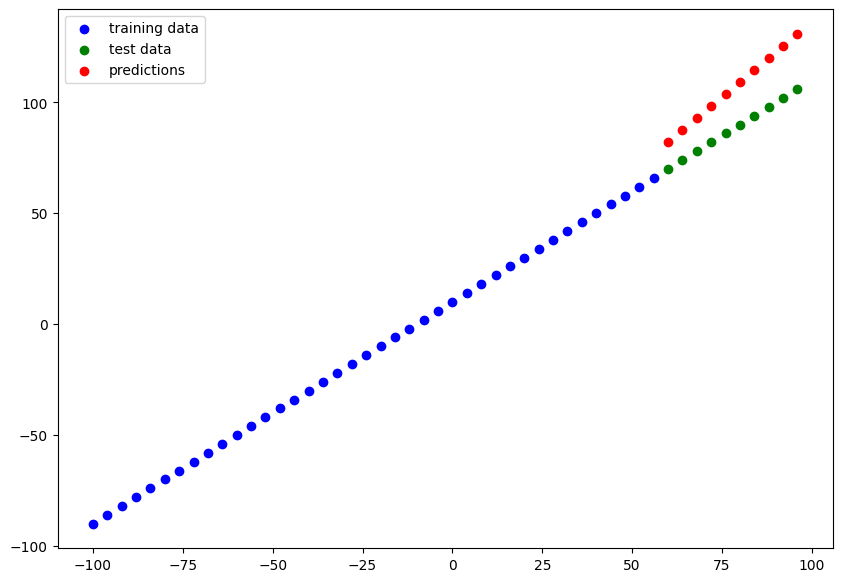

In [ ]:
#make and plot predictions for model 2

y_pred_2 = model_2.predict(tf.expand_dims(x_test,axis=-1))
plot_pred(predictions=y_pred_2)


In [ ]:
y_preds_2 = tf.squeeze(y_pred_2)
# calculate model_1 evaluation metrics
mae2 = mae(y_test,y_pred_2)
mse2 = mse(y_test,y_pred_2)
mae2 , mse2

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([12.22583 , 13.637428, 15.047417, 16.45742 , 17.867424, 19.277435,
        20.687431, 22.097435, 23.507439, 24.91745 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([149.47092, 185.97945, 226.42474, 270.84668, 319.24484, 371.6195 ,
        427.96982, 488.29663, 552.5997 , 620.87933], dtype=float32)>)

**Build `model_3`

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(x_train,y_train,epochs=500)
#make and plot predictions for model 2

y_pred_3 = model_3.predict(tf.expand_dims(x_test,axis=-1))

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step - loss: 37.1073 - mae: 37.1073
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3592 - mae: 19.3592 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1552 - mae: 22.1552 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.9060 - mae: 18.9060 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9021 - mae: 6.9021 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0704 - mae: 12.0704 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.2445 - mae: 14.2445 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2509 - mae: 10.2509
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9430 - mae: 6.9430 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.5693 - mae: 11.5693 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.6963 - mae: 13.6963 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6484 - mae: 15.6484 
Epoch 13/500
2/2 ━━━━━━━━━━━━

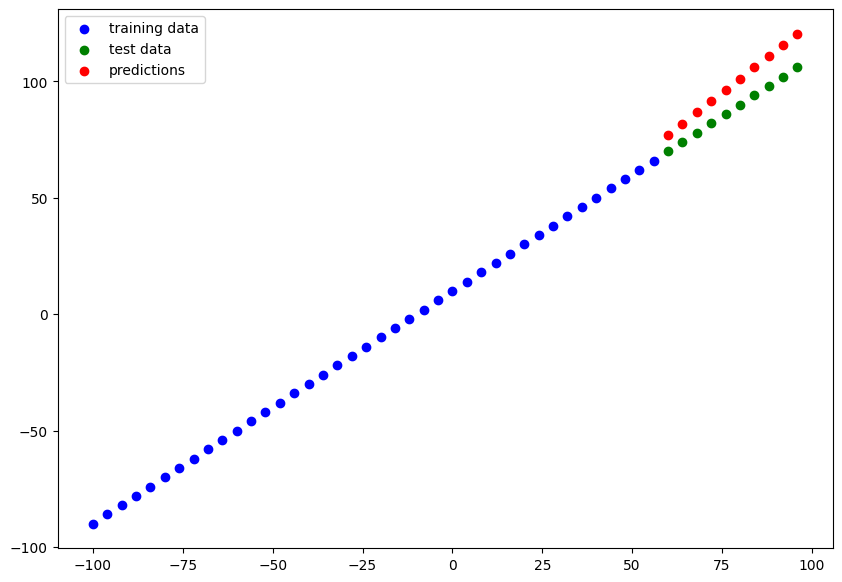

In [ ]:
plot_pred(predictions=y_pred_3)

In [ ]:
y_preds_3 = tf.squeeze(y_pred_3)
# calculate model_1 evaluation metrics
mae3 = mae(y_test,y_pred_3)
mse3 = mse(y_test,y_pred_3)
mae3, mse3

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 7.0370865,  7.859627 ,  8.682159 ,  9.5047   , 10.327232 ,
        11.149765 , 11.972298 , 12.7948   , 13.616158 , 14.437332 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 49.520588,  61.77373 ,  75.37989 ,  90.33932 , 106.651726,
        124.31726 , 143.3359  , 163.70691 , 185.39975 , 208.43655 ],
       dtype=float32)>)

Extra `model_4`

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_4.fit(x_train,y_train,epochs=500 , verbose = 0)
#make and plot predictions for model 2

y_pred_4 = model_4.predict(tf.expand_dims(x_test,axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


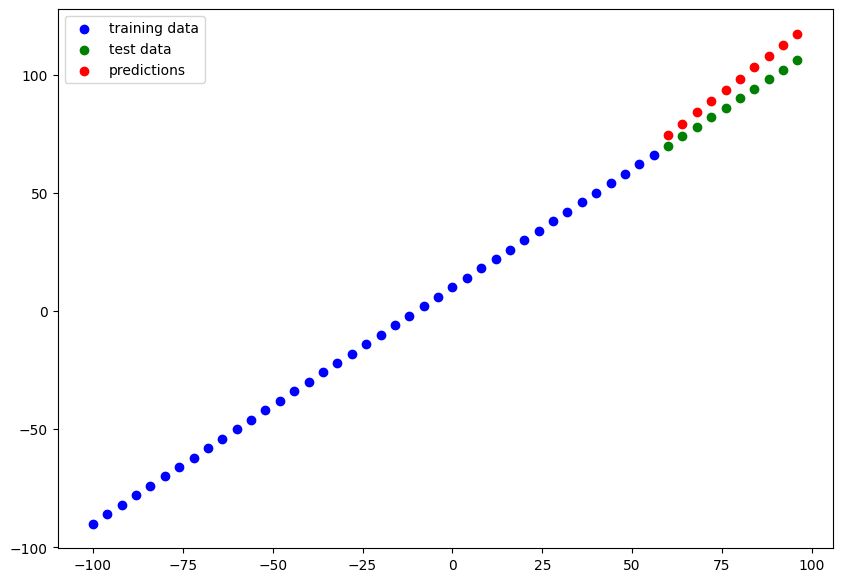

In [ ]:
plot_pred(predictions=y_pred_4)

In [ ]:
y_preds_4 = tf.squeeze(y_pred_4)
# calculate model_1 evaluation metrics
mae4 = mae(y_test,y_pred_4)
mse4 = mse(y_test,y_pred_4)
mae4, mse4

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 4.545418 ,  5.2934494,  6.0414886,  6.789528 ,  7.5375595,
         8.285599 ,  9.033638 ,  9.781677 , 10.529701 , 11.2777405],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 20.660822,  28.020607,  36.499584,  46.09769 ,  56.814804,
         68.651146,  81.60661 ,  95.68121 , 110.87461 , 127.18743 ],
       dtype=float32)>)

how about we change mae to mse? and add a layer

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])

model_5.fit(x_train,y_train,epochs=500 , verbose = 0)
#make and plot predictions for model 5

y_pred_5 = model_5.predict(tf.expand_dims(x_test,axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


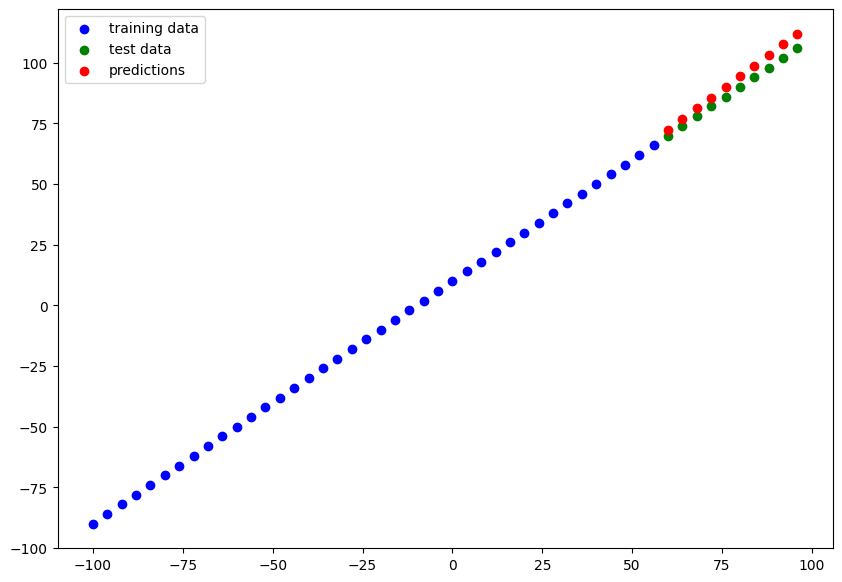

In [ ]:
plot_pred(predictions=y_pred_5)

In [ ]:
y_preds_4 = tf.squeeze(y_pred_5)
# calculate model_1 evaluation metrics
mae5 = mae(y_test,y_pred_5)
mse5 = mse(y_test,y_pred_5)
mae5, mse5

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([2.4366226, 2.8254395, 3.2142792, 3.6031265, 3.9919662, 4.3808136,
        4.7696533, 5.1585007, 5.547348 , 5.9361877], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 5.93713 ,  7.983108, 10.331591, 12.982521, 15.935795, 19.191528,
        22.749594, 26.610128, 30.77307 , 35.238323], dtype=float32)>)

In [ ]:
np.mean((tf.abs(y_test-y_pred_5)))

14.337354

### comparing the results of our experiments

In [ ]:
import pandas as pd

model_results = [["model_1",np.mean(mae1),np.mean(mse1)],
                 ["model_2",np.mean(mae2),np.mean(mse2)],
                 ["model_3",np.mean(mae3),np.mean(mse3)],
                 ["model_4",np.mean(mae4),np.mean(mse4)],
                 ["model_5",np.mean(mae5),np.mean(mse5)]]

all_results = pd.DataFrame(model_results,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,16.106354,260.636078
1,model_2,18.572271,361.333160
2,model_3,10.738115,120.886169
3,model_4,7.911580,67.209457
4,model_5,4.186394,18.773279


In [ ]:
model_5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,665 (14.32 KB)

 Trainable params: 1,221 (4.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,444 (9.55 KB)

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiance.

And when doing so , it can be tedious if you're running a lot of experiments .

Luckily , there are tools to help us !

**Resources** :

* Tensorboard
* Weights and biases


## Saving our model

saving our model allows us to use them outside of colab notebook , or whatever they were trained for , ex - web or mobile app

two main formats:
1. the SavedModel format
2. the HDF5 format

In [ ]:
# did it in fire detection repo
# using SavedModel

model_5.save('model_5.keras')

In [ ]:
# using HDF5

model_5.save('model_5.h5')

In [ ]:
model = tf.keras.models.load_model('model_5.h5')

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,223 (4.78 KB)

 Trainable params: 1,221 (4.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model.evaluate(x_test ,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 18.7733 - mean_squared_error: 18.7733


[18.77328109741211, 18.77328109741211]

In [ ]:
tf.squeeze(model.predict(x_test))-y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.4366226, 2.8254395, 3.2142792, 3.6031265, 3.9919662, 4.3808136,
       4.7696533, 5.1585007, 5.547348 , 5.9361877], dtype=float32)>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


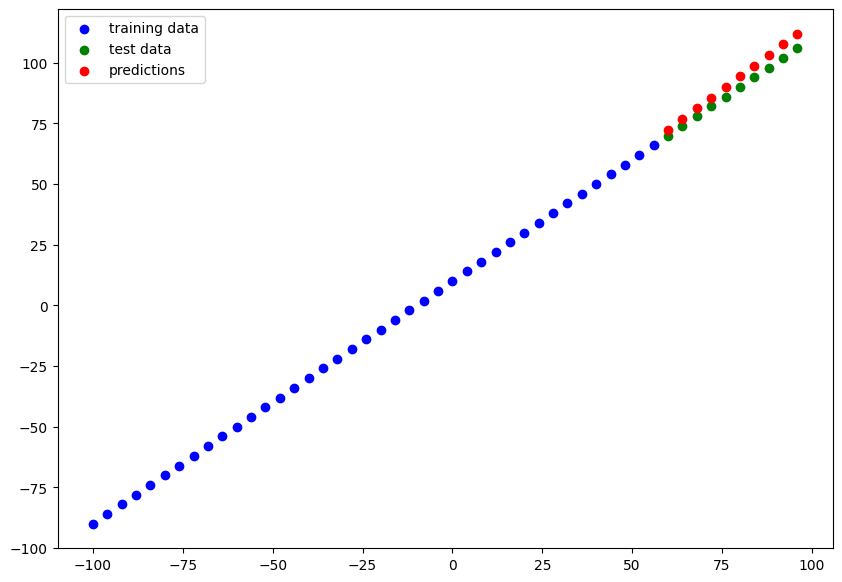

In [ ]:
plot_pred(predictions=model.predict(x_test))

In [ ]:
# to download a file using code rather than going to file tab and clicking download
'''
from google.colab import files
files.download('file/path')
'''

"\nfrom google.colab import files\nfiles.download('file/path')\n"

In [ ]:
# third way is to save it to google drive
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
# another way using !cp
'''
!cp 'from/file/path' 'to/file/path'
'''

"\n!cp 'from/file/path' 'to/file/path'\n"

## Larger Example

In [ ]:
# import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the insurance dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# encoding required
dataset = pd.get_dummies(dataset,dtype=int)
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and Y values ( features and labels )
X = dataset.drop('charges',axis=1)
y = dataset['charges']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

model.fit(x_train,y_train,epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 13290.0752 - mae: 13290.0752
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13208.3008 - mae: 13208.3008 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13033.9971 - mae: 13033.9971 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12680.7061 - mae: 12680.7061
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12048.2871 - mae: 12048.2871
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11058.7715 - mae: 11058.7715
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9812.6592 - mae: 9812.6592
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8575.8398 - mae: 8575.8398 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7724.5894 - mae: 7724.5894
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7456.5674 - mae: 7456.5674
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7408.8315 - mae: 7408.8315
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [ ]:
y_pred=model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
results

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5034.6528 - mae: 5034.6528


[5098.75146484375, 5098.75146484375]

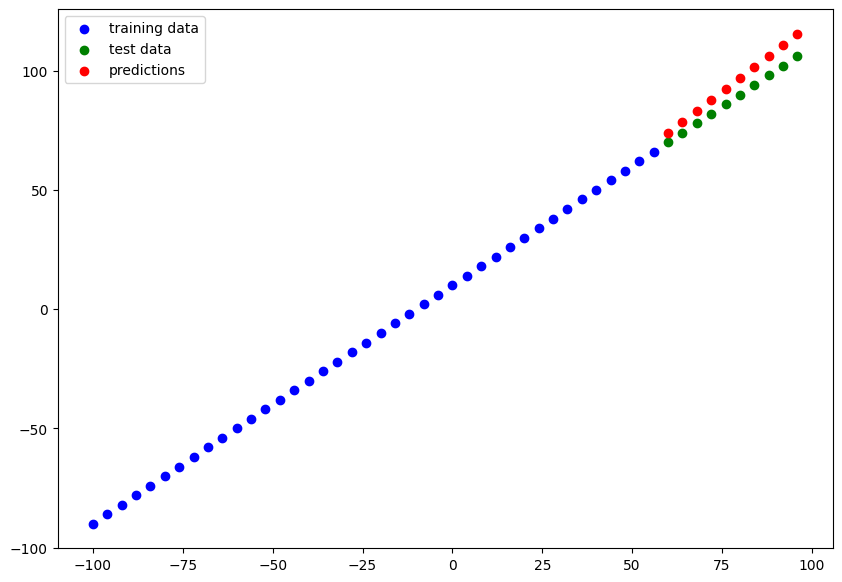

In [ ]:
plot_pred()

In [ ]:
# improve our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['mae'])

model.fit(x_train,y_train,epochs=150)


Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 12824.3516 - mae: 12824.3516
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7740.6592 - mae: 7740.6592
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7273.4966 - mae: 7273.4966 
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7080.3257 - mae: 7080.3257
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6873.5776 - mae: 6873.5776
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6617.7676 - mae: 6617.7676
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6368.5278 - mae: 6368.5278
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6246.2070 - mae: 6246.2070
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6134.1035 - mae: 6134.1035
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6008.0776 - mae: 6008.0776
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5850.4419 - mae: 5850.4419 
Epoch 12/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
results

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1778.5323 - mae: 1778.5323


[1769.1806640625, 1769.1806640625]

In [ ]:
# so ok , we got our mae down by a huge amount :)
5546.0303-1781.4080

3764.6223000000005

### Preprocessing Data ( standardization and normalization )

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

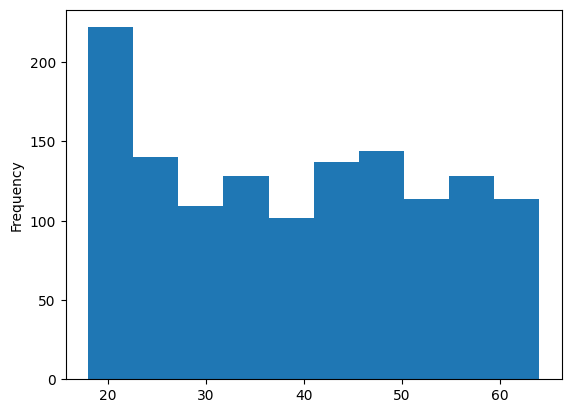

In [ ]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

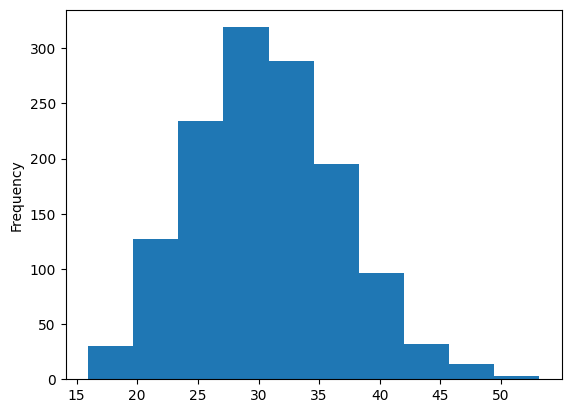

In [ ]:
X['bmi'].plot(kind = 'hist')

In [ ]:
# not on the same/common scale
# what we do? - scaling - minmax or standard
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split


scaler = MinMaxScaler()
ct = make_column_transformer(
    (scaler,['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']),
    remainder='passthrough'
)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(x_train)

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [ ]:
x_train_normal[91] # in numpy array form


array([0.5       , 0.40516546, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [ ]:
x_train.shape , x_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded :)


In [ ]:
# improve our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['mae'])

model.fit(x_train_normal,y_train,epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13274.0957 - mae: 13274.0957
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12502.0020 - mae: 12502.0020
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9104.0645 - mae: 9104.0645
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7723.6538 - mae: 7723.6538
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7301.9697 - mae: 7301.9697
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6807.2764 - mae: 6807.2764 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6116.3403 - mae: 6116.3403
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5139.1689 - mae: 5139.1689
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4141.9043 - mae: 4141.9043
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3639.6624 - mae: 3639.6624 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3535.2346 - mae: 3535.2346
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [ ]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [ ]:
model.evaluate(x_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2212.6882 - mae: 2212.6882


[2290.67138671875, 2290.67138671875]

ok we didnt get the best one after normalizing . but well we can always improve it now by tuning hyperparameters further
